Middle is on x:375 and y:441


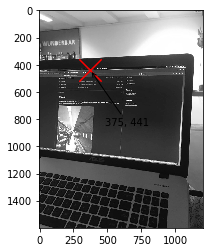

Middle is on x:500 and y:300


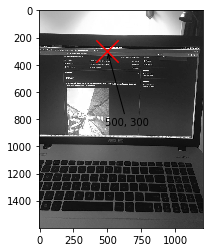

Middle is on x:596 and y:173


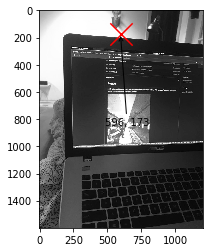

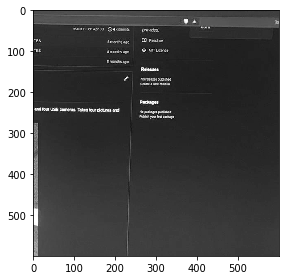

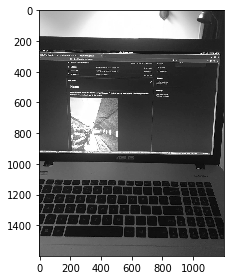

In [59]:
# importing cv2  
import cv2  
from skimage import data, io, filters, color, feature
import numpy as np
import matplotlib.pyplot as plt

# Read files
filename = 'laptop'
coll = io.ImageCollection(f'data/{filename}*.jpeg')
# right = color.rgb2gray(coll[0])
main = color.rgb2gray(coll[1])
# left = color.rgb2gray(coll[2])

# Get the middle of the main image
x, y = main.shape
size = 600
template = middle[y//2-size//2:y//2+size//2, x//2-size//2:x//2+size//2]

# Search for middle of main in 
for im in coll:
    im = color.rgb2gray(im)
    result = feature.match_template(im, template)
    ij = np.unravel_index(np.argmax(result), result.shape)
    x, y = ij[::-1]
    print(f'Middle is on x:{x} and y:{y}')
    plt.figure()
    plt.imshow(im, cmap='gray', vmin=0, vmax=1)
    plt.annotate(f'{x}, {y}', xy=(x, y), xycoords='data',
                 xytext=(0.5, 0.5), textcoords='figure fraction',
                 arrowprops=dict(arrowstyle="->"))
    plt.scatter(x,y, s=500, c='red', marker='x')
    plt.show()
    
# Displaying the image  
io.imshow(template)
io.show()
io.imshow(middle)
io.show()